In [170]:
import math
from queue import PriorityQueue
import numpy as np
from PIL import Image, ImageDraw

def RecoverPath(s,g,pred):
        path = [g]
        while g != s:
            path.append(pred[g])
            g = pred[g]
        #path = path.reverse()
        return path

def heur(v1,v2):
    h = math.dist(v1,v2)
    return h

def neighbors(v,V):
    #print(v)
    N = []
    V = np.asarray(V)
    row_V = V.shape[0]
    col_V = V.shape[1]
    for i in [-1,0,1]:
        for j in [-1,0,1]:
            x = v[0]
            y = v[1]
            N.append((x+i,y+j))
            if (x + i > row_V-1) or (x+i <= 0) or (y + j > col_V-1) or (y + j <= 0) or V[x+i][y+j] == 0 or (x+i == x) and (y+j == y):
                N.remove((x+i,y+j))
    return(N)

def nxt_dst(v1,v2):
    w = math.dist(v1,v2)
    return w

#s = starting point, g = goal
def A_Star_Search(V,s,g,neighbors,nxt_dst,heur):
    CostTo = dict()
    EstTotalCost = dict()
    pred = dict()
    for i in range(V.shape[0]):
        for j in range(V.shape[1]):
            vertex = (i,j)
            CostTo[vertex] = float('inf')
            EstTotalCost[vertex] = float('inf')
    CostTo[s] = 0
    EstTotalCost[s] = heur(s,g)
    Q = PriorityQueue()
    Q.put((heur(s,g),s))
    while not Q.empty():
        vertex = Q.get()[1]
        if vertex == g:
            print("recieved path") 
            return RecoverPath(s,g,pred)
        for i in neighbors(vertex,V):
            pvi = CostTo[vertex] + nxt_dst(vertex,i)
            if pvi < CostTo[i]:
                pred[i] = vertex
                CostTo[i] = pvi
                EstTotalCost[i] = pvi + heur(i,g)
                Q.put((heur(s,g),s))
                if i == Q.get()[1]:
                    Q.queue.remove(i)
                else:
                    Q.put((EstTotalCost[i],i))
    return(print("no path found"))
        

In [204]:
from PIL import Image, ImageDraw
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
img = Image.open('occupancy_map.png')#.convert('1')

occupancy_grid = (np.asarray(img) > 0).astype(int)
path = A_Star_Search(occupancy_grid,(635,140),(350,400),neighbors,nxt_dst,heur)

recieved path


In [232]:
def invert(path):
    path1 = []
    for i in range(len(path)):
            coords = (path[i][1],path[i][0])
            path1.append(coords)
    return(path1)
new = invert(path)

def calc_total_distance(point_list):
    total_dist = 0
    for i in range(len(point_list)-1):
        dist = math.sqrt((point_list[i][0] - point_list[i+1][0])** 2 + (point_list[i][1] - point_list[i+1][1])** 2)
        total_dist += dist
    return(total_dist)

#point_list = [(1,2), (2,2), (2,10)]
print(calc_total_distance(new))

draw_line = ImageDraw.Draw(img)
draw_line.line(new, width = 3, fill="red")
img.save("line.png")

803.1147904132629


In [216]:
import random
from bresenham import bresenham

def rand_vertex(M):
    val_1 = []
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            if M[i][j] == 1:
                points = (i,j)
                val_1.append(points)
    v = random.choice(val_1)
    return(v)

# x = (0,0)
# y = (6,8)
# M = occupancy_grid

def check(v1,v2,M):
    points = list(bresenham(v1[0],v1[1],v2[0],v2[1]))
    for i in range(len(points)-1):
            if M[points[i][0]][points[i][1]] == 0:
                return False
            else:
                True

# check(x,y,M)



In [226]:
import networkx as nx

def AddVertex(G, vNew, dMax,M):
    nodes = G.number_of_nodes()
    G.add_node(nodes + 1, pos=(vNew[0], vNew[1]))
    for i in G.nodes(data=True):
        if check(i[1]['pos'],vNew,M) and i[0] != nodes+1:
            dist = heur(vNew,i[1]['pos'])
            if(dist < dMax):
                G.add_edge(nodes+1,i[0], weight = dist)

    pass

def ConstructPRM(N, dMax,M):
    G = nx.Graph()
    for k in range(0,N):
        new_vertex = rand_vertex(M)
        # sample a new vertx vNew from C
        AddVertex(G, new_vertex, dMax,M)
    return G

In [233]:
PRM = ConstructPRM(2500,75,occupancy_grid)

{1: (153, 244), 2: (563, 166), 3: (193, 124), 4: (498, 140), 5: (68, 385), 6: (369, 223), 7: (102, 511), 8: (369, 343), 9: (363, 352), 10: (443, 231), 11: (515, 207), 12: (232, 165), 13: (259, 444), 14: (186, 330), 15: (218, 373), 16: (206, 452), 17: (136, 108), 18: (277, 531), 19: (453, 227), 20: (261, 173), 21: (304, 197), 22: (83, 439), 23: (213, 113), 24: (232, 148), 25: (476, 335), 26: (108, 403), 27: (226, 217), 28: (573, 208), 29: (473, 236), 30: (551, 203), 31: (191, 114), 32: (138, 163), 33: (634, 178), 34: (119, 70), 35: (447, 180), 36: (175, 204), 37: (322, 209), 38: (461, 108), 39: (263, 592), 40: (73, 307), 41: (106, 365), 42: (491, 376), 43: (563, 110), 44: (656, 165), 45: (356, 252), 46: (168, 75), 47: (146, 41), 48: (544, 209), 49: (343, 214), 50: (207, 141), 51: (149, 160), 52: (71, 92), 53: (288, 201), 54: (134, 160), 55: (358, 268), 56: (85, 272), 57: (93, 280), 58: (240, 150), 59: (511, 157), 60: (508, 71), 61: (188, 334), 62: (230, 478), 63: (123, 134), 64: (94, 99

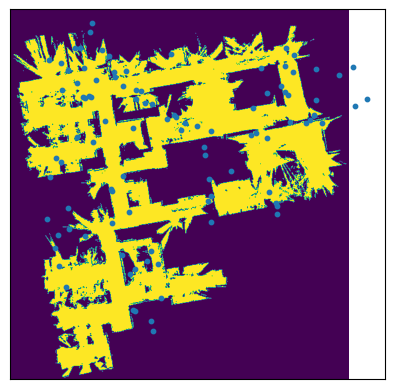

In [225]:
import matplotlib.pyplot as plt

x = PRM.nodes()
nodes ={}
for node in x:
    pos_node = x[node]['pos']
    nodes[node] = pos_node
print(nodes)

photoPlot = plt.imread('occupancy_map.png')
fig, ax = plt.subplots()
photoPlot = ax.imshow(photoPlot)
nx.draw_networkx(PRM, pos=nodes, node_size=10, with_labels=False)
plt.show()
    

In [ ]:
AddVertex(PRM, [635, 140], 75, occupancy_grid)
AddVertex(PRM, [350, 400], 75, occupancy_grid)
aStarPath = nx.astar_path(PRM,2501, 2502, heuristic=None, weight='weight')